#### 1. Load in data

In [1]:
# load libraries
import os
import shutil
import tarfile
import urllib.request
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf

Importing Data and checking lables. Decreased classes to 20

In [3]:
# import libraries for downloading the data

import os
import glob
import urllib.request
import tarfile

# to make google colab compatible
DATA_DIR = "/content/data" # where all downloaded data will go

# where folder containing images subfolders will go
IMAGES_ROOT = os.path.join(DATA_DIR, "Images")

# where folder of annotations will go
ANNOT_ROOT  = os.path.join(DATA_DIR, "Annotation")

# create the directory if it doesn't exist yet
os.makedirs(DATA_DIR, exist_ok=True)

# download the images and annotate tars
IMAGES_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
ANNOT_URL  = "http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar"

# where to save image tar file into images folder
IMAGE_TAR_PATH = os.path.join(DATA_DIR, "images.tar")

# where to save annotation file into annotation folder
ANNOT_TAR_PATH = os.path.join(DATA_DIR, "annotation.tar")

# function to download the file
def download(url, path):
    if os.path.exists(path):
        print(f"{path} already exists, skipping download.")
        return
    print(f"Downloading {url} ...")
    urllib.request.urlretrieve(url, path)
    print("Done!\n")
# download images if not already downloaded
download(IMAGES_URL, IMAGE_TAR_PATH)
# download annotations if not already downloaded
download(ANNOT_URL, ANNOT_TAR_PATH)

# function to extarct the tar files that were downloaded
def extract(tar_path, extract_to):
    print(f"Extracting {tar_path} ...")
    with tarfile.open(tar_path) as tar:
        tar.extractall(extract_to)
    print("Done!\n")
# extracts the data if it wasn't extracted already
extract(IMAGE_TAR_PATH, DATA_DIR)
extract(ANNOT_TAR_PATH, DATA_DIR)

# to sort the breed folders
if not os.path.exists(IMAGES_ROOT):
    raise FileNotFoundError(f"{IMAGES_ROOT} not found. Check extraction paths.")

# sort the breeds alphabetically
breeds = sorted(os.listdir(IMAGES_ROOT))

# prints number of breeds
print("Number of breeds:", len(breeds))
# prints the first 10 breed names
print("First 10 breeds:", breeds[:10], "\n")

# Mapping from breed to index based on sorted order
class_to_idx = {breed: idx for idx, breed in enumerate(breeds)}

# to pair images with annotations folders properly

# lists to storey images and labels
images = []
labels = []

for breed in breeds: # to loop through each breed folder
    breed_img_dir   = os.path.join(IMAGES_ROOT, breed) # path for each image folder
    breed_annot_dir = os.path.join(ANNOT_ROOT, breed) # path for eah annotation folder

     # to list all the images for breed at the moment
    image_files = glob.glob(os.path.join(breed_img_dir, "*.jpg"))

    # for each file, extract the filename
    for img_path in image_files:
        base = os.path.splitext(os.path.basename(img_path))[0]

        # to check that annotation folder exists (latest tar format)
        annot_folder = os.path.join(breed_annot_dir, base)
        if not os.path.exists(annot_folder):
            print("Missing annotation for:", img_path)
            continue # if not missing annotation proceeds with a warning
        # if annotation, append to images and labels properly
        images.append(img_path)
        labels.append(class_to_idx[breed])

print("Total usable images:", len(images))

# an example entry
if len(images) > 0:
    print("\nExample image path:", images[0])
    print("Label index:", labels[0])
    print("Breed:", breeds[labels[0]])
else:
    print("No images were successfully paired. Check extraction paths.")


/content/data/images.tar already exists, skipping download.
/content/data/annotation.tar already exists, skipping download.
Extracting /content/data/images.tar ...


/tmp/ipython-input-3578446810.py:47: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(extract_to)


Done!

Extracting /content/data/annotation.tar ...
Done!

Number of breeds: 120
First 10 breeds: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound'] 

Total usable images: 20580

Example image path: /content/data/Images/n02085620-Chihuahua/n02085620_2650.jpg
Label index: 0
Breed: n02085620-Chihuahua


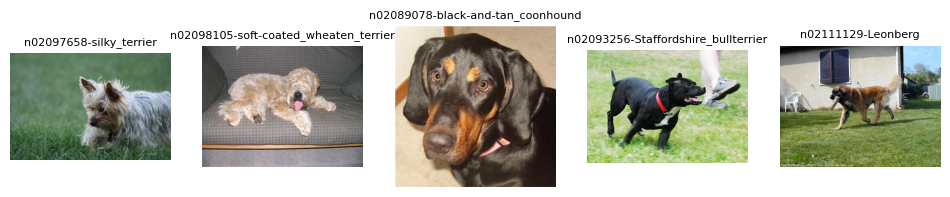

In [4]:
# code to check output of labels
import matplotlib.pyplot as plt
# import numpy to
import numpy as np
import random
from PIL import Image

# sample 5 images randomly and print image and label
sample_indices = random.sample(range(len(images)), 5)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    img = Image.open(images[idx])
    label = labels[idx]
    breed_name = breeds[label]

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(breed_name, fontsize=8)
    plt.axis('off')
plt.show()


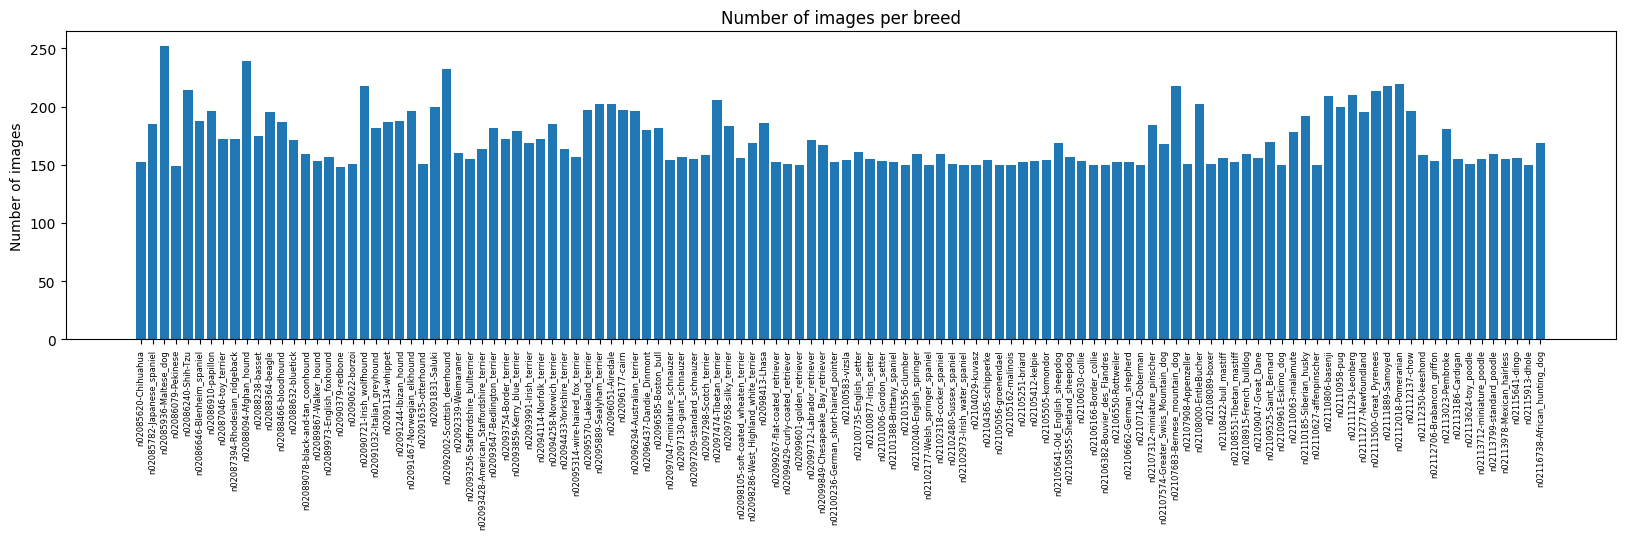

In [5]:
# see distribution of current coutns per breed / class

# get counts for each breeds
counts = [labels.count(i) for i in range(len(breeds))]

# plotting
plt.figure(figsize=(20,4))
plt.bar(range(len(breeds)), counts)
plt.xticks(range(len(breeds)), breeds, rotation=90, fontsize=6)
plt.ylabel("Number of images")
plt.title("Number of images per breed")
plt.show()

In [5]:
# to ensure there are 120 labels used
unique_labels = set(labels)
print("Number of unique labels:", len(unique_labels))
assert len(unique_labels) == len(breeds)
# assertion works and is good

Number of unique labels: 120


In [6]:
# check a breed
  # do chiuahua since it was given in one of the ouput above
breed_to_check = "n02085620-Chihuahua"
breed_idx = class_to_idx[breed_to_check]

# get all images with this label
breed_images = [img for img, lbl in zip(images, labels) if lbl == breed_idx]

print(f"Number of images labeled {breed_to_check}: {len(breed_images)}")
print("First 5 image paths:", breed_images[:5])


Number of images labeled n02085620-Chihuahua: 152
First 5 image paths: ['/content/data/Images/n02085620-Chihuahua/n02085620_2650.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_3742.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_4515.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_7440.jpg', '/content/data/Images/n02085620-Chihuahua/n02085620_8420.jpg']


In [7]:
# Decrease to 20 most frequently occurring breeds

breed_counts = []

for breed in os.listdir(IMAGES_ROOT):
    breed_path = os.path.join(IMAGES_ROOT, breed)

    # count jpg files
    n_images = sum(
        f.lower().endswith(".jpg")
        for f in os.listdir(breed_path)
    )

    breed_counts.append((breed, n_images))

# sort by freq (desc)
breed_counts.sort(key=lambda x: x[1], reverse=True)

# select top 20
selected_breeds = [breed for breed, count in breed_counts[:20]]

print("Selected breeds (top 20):")
print(selected_breeds)

# filter
breeds = selected_breeds

Selected breeds (top 20):
['n02085936-Maltese_dog', 'n02088094-Afghan_hound', 'n02092002-Scottish_deerhound', 'n02112018-Pomeranian', 'n02107683-Bernese_mountain_dog', 'n02090721-Irish_wolfhound', 'n02111889-Samoyed', 'n02086240-Shih-Tzu', 'n02111500-Great_Pyrenees', 'n02111129-Leonberg', 'n02110806-basenji', 'n02097474-Tibetan_terrier', 'n02096051-Airedale', 'n02108000-EntleBucher', 'n02095889-Sealyham_terrier', 'n02091831-Saluki', 'n02110958-pug', 'n02095570-Lakeland_terrier', 'n02096177-cairn', 'n02096294-Australian_terrier']


#### 2. Conduct Data Splits

In [11]:
# import progress bar
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split


OUTPUT_DIR = os.path.join(DATA_DIR, "data_splits")
os.makedirs(OUTPUT_DIR, exist_ok=True)

train_dir = os.path.join(OUTPUT_DIR, "train")
val_dir = os.path.join(OUTPUT_DIR, "val")
test_dir = os.path.join(OUTPUT_DIR, "test")

for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

# # need to sort breeds
# breeds = sorted(os.listdir(IMAGES_ROOT))


for breed in tqdm(breeds, desc="Splitting breeds"):
    breed_path = os.path.join(IMAGES_ROOT, breed)

    # all image paths for this breed
    image_files = [
        os.path.join(breed_path, f)
        for f in os.listdir(breed_path)
        if f.lower().endswith(".jpg")
    ]

    # create splits now

    # 70% train, 15% val, 15% test for splits
    train_imgs, temp_imgs = train_test_split(
        image_files, test_size=0.30, random_state=42
    )
    val_imgs, test_imgs = train_test_split(
        temp_imgs, test_size=0.50, random_state=42
    )

    # output breed folders
    for split_name, split_imgs in zip(["train", "val", "test"],
                                      [train_imgs, val_imgs, test_imgs]):

        split_breed_folder = os.path.join(OUTPUT_DIR, split_name, breed)
        os.makedirs(split_breed_folder, exist_ok=True)

        # copy images to proper split folder
        for img_path in split_imgs:
            shutil.copy(img_path, split_breed_folder)

print("Dataset split complete!")
print(f"Train directory: {train_dir}")
print(f"Val directory:   {val_dir}")
print(f"Test directory:  {test_dir}")

Splitting breeds: 100%|██████████| 20/20 [00:00<00:00, 26.39it/s]

Dataset split complete!
Train directory: /content/data/data_splits/train
Val directory:   /content/data/data_splits/val
Test directory:  /content/data/data_splits/test


In [12]:
# sanity check for decrease to 20 breeds
for split in ["train", "val", "test"]:
    breeds_in_split = sorted(os.listdir(os.path.join(OUTPUT_DIR, split)))
    print(split, len(breeds_in_split), "breeds")
    print(breeds_in_split)

train 20 breeds
['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02096294-Australian_terrier', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02108000-EntleBucher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian']
val 20 breeds
['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02096294-Australian_terrier', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02108000-EntleBucher', 'n02110806-basenji', 'n02110958-pug', 'n02111129-Leonberg', 'n02111500-Great_Pyrenees

In [14]:
# to double check the counts per image split
for split in ["train", "val", "test"]:
    total = sum(len(files) for _, _, files in os.walk(os.path.join(OUTPUT_DIR, split)))
    print(split, total)


train 2963
val 637
test 644


In [15]:
# check that the total number of breeds is preseved
print(len(os.listdir(train_dir)), "breeds in train")
print(len(os.listdir(val_dir)),   "breeds in val")
print(len(os.listdir(test_dir)),  "breeds in test")

# all 20 breeds in each split data

20 breeds in train
20 breeds in val
20 breeds in test


#### 3. Convert to TF Dataset for efficiency

In [16]:
# convert to pytorch dataset


import tensorflow as tf

IMG_SIZE = 224
BATCH_SIZE = 32

#split directories
OUTPUT_DIR = os.path.join(DATA_DIR, "data_splits")
train_dir = os.path.join(OUTPUT_DIR, "train")
val_dir   = os.path.join(OUTPUT_DIR, "val")
test_dir  = os.path.join(OUTPUT_DIR, "test")

# training dataset first
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

# validation dataset now
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
)

# test dataset last
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="int",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
)


Found 2963 files belonging to 20 classes.
Found 637 files belonging to 20 classes.
Found 644 files belonging to 20 classes.


#### 4. Cleaning/Augmentation with Keras

In [17]:
# data augmentation using pytorch
from torchvision import datasets, transforms
from  keras import Sequential
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom

# data augmentation

data_augmentation = Sequential([
    Rescaling(1./255), # normalize pixel values
   RandomFlip("horizontal"), # random horizontal flip
  RandomRotation(0.1), # random rotations up to 0.10 degrees
  RandomZoom(0.1) #random zoom in/out by 90-110%
])

# 2. Normalization only for validation/test
normalization = Rescaling(1./255)

# 3. Apply augmentation/normalization to datasets

# train gets augmentations
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# validation and test only normalized
val_ds = val_ds.map(lambda x, y: (normalization(x), y))
test_ds = test_ds.map(lambda x, y: (normalization(x), y))

# 4. Cache, shuffle, prefetch for performance

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds  = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

#### 5. Build CNN Structure

In [18]:
from tensorflow.keras import layers, optimizers, models
import keras

def cnn_base_model():
    # using sequential
    model = keras.models.Sequential([

        # creating first convolutional block
        # first convolution layer
        layers.Conv2D(32, (3,3), padding='same', input_shape=(224,224,3)),
        # then BatchNormalization - to normalize the activations of each layer
        layers.BatchNormalization(),
        # Maxpooling - to reduce spatial zsize by taking max value in each window
        layers.MaxPooling2D(2,2),

        # second convolution block
        layers.Conv2D(64, (3,3), padding='same'), # similar set up as prev block
        # add BatchNormalization
        layers.BatchNormalization(),
        # max pooling
        layers.MaxPooling2D(2,2),

        # third convolution block
        layers.Conv2D(128, (3,3), padding='same'), # similar as above
        # add BatchNormalization
        layers.BatchNormalization(),
        # add max pooling
        layers.MaxPooling2D(2,2),

        # now to add dense layer

        # first need to flatten
        layers.Flatten(),

        # one dense layer
        layers.Dense(128),
        # add batch normalization
        layers.BatchNormalization(),
        # add a dropout layer
        layers.Dropout(0.4),

        # need the output layer for 120 classes (breeds of dogs)
        layers.Dense(120, activation='softmax')
    ])

    # to compile the model
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',  # use this bc integer class labels
        metrics=['accuracy']
    )

    # print summary of model
    model.summary()
    return model

model = cnn_base_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        15,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,955,320 (49.42 MB)

 Trainable params: 12,954,616 (49.42 MB)

 Non-trainable params: 704 (2.75 KB)

#### 6. Training

In [19]:
# early stopping to prevent overfitting
from keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[callback]
)


Epoch 1/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 58s 153ms/step - accuracy: 0.1011 - loss: 4.8298 - val_accuracy: 0.1020 - val_loss: 4.4463
Epoch 2/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.2228 - loss: 3.5249 - val_accuracy: 0.0801 - val_loss: 4.3239
Epoch 3/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.3140 - loss: 2.8140 - val_accuracy: 0.1177 - val_loss: 3.6521
Epoch 4/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.4254 - loss: 2.1359 - val_accuracy: 0.1177 - val_loss: 3.2856
Epoch 5/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6628 - loss: 1.2437 - val_accuracy: 0.1272 - val_loss: 3.1972
Epoch 6/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9103 - loss: 0.4766 - val_accuracy: 0.1177 - val_loss: 3.7580
Epoch 7/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9818 - loss: 0.1747 - val_accuracy: 0.1381 - val_loss: 3.5282
Epoch 8/25
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.9978 - loss: 0.0755 - val_accuracy: 0.1538 -

#### 7. Visualize Training Progress

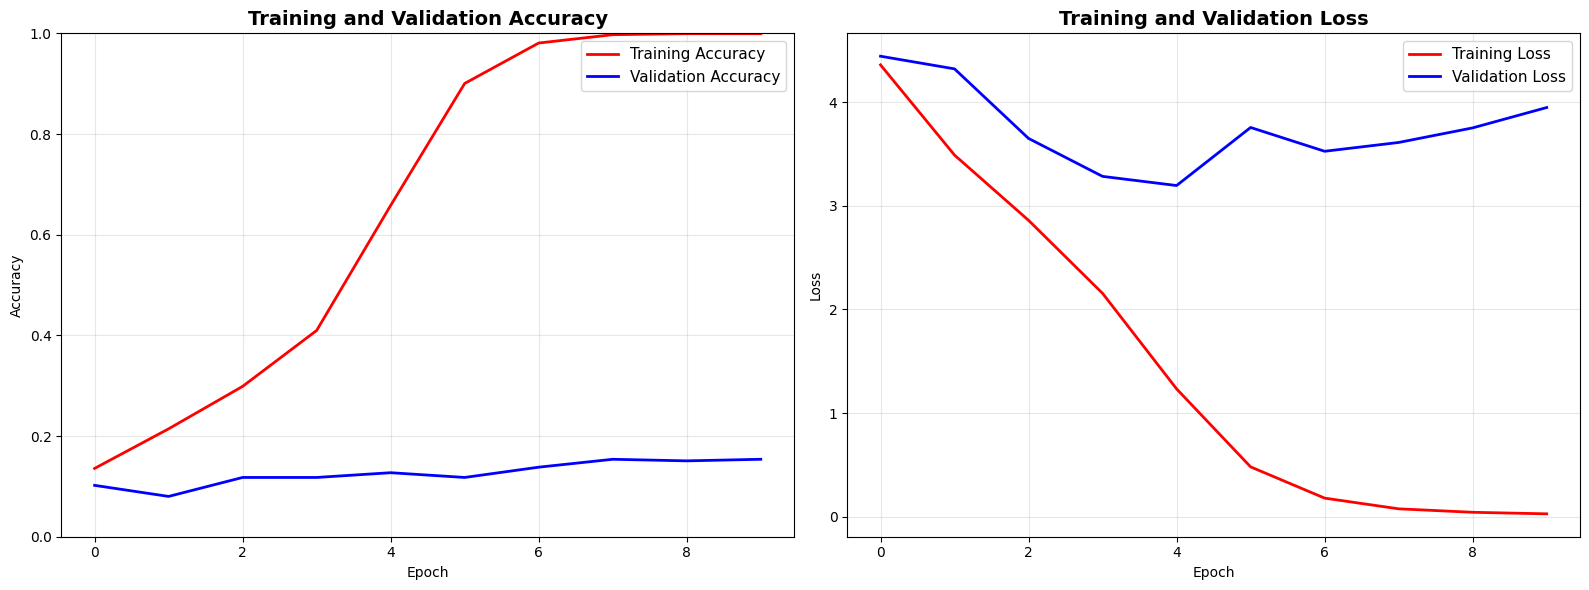


  Training Summary
  Best Training Accuracy:   0.9993
  Best Validation Accuracy: 0.1538
  Final Training Accuracy:  0.9993
  Final Validation Accuracy:0.1538
  Accuracy Gap (final):     0.8455


In [20]:
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy plot
ax1.plot(epochs_range, acc, 'r-', linewidth=2, label="Training Accuracy")
ax1.plot(epochs_range, val_acc, 'b-', linewidth=2, label="Validation Accuracy")
ax1.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(fontsize=11); ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Loss plot
ax2.plot(epochs_range, loss, 'r-', linewidth=2, label="Training Loss")
ax2.plot(epochs_range, val_loss, 'b-', linewidth=2, label="Validation Loss")
ax2.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(fontsize=11); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stats printout
print(f"\n{'='*60}")
print("  Training Summary")
print(f"{'='*60}")
print(f"  Best Training Accuracy:   {max(acc):.4f}")
print(f"  Best Validation Accuracy: {max(val_acc):.4f}")
print(f"  Final Training Accuracy:  {acc[-1]:.4f}")
print(f"  Final Validation Accuracy:{val_acc[-1]:.4f}")
print(f"  Accuracy Gap (final):     {abs(acc[-1] - val_acc[-1]):.4f}")
print(f"{'='*60}")

#### 8. Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

# Evaluate on test set
print("Evaluating on test set...")
test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Collect true labels and predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Manual accuracy
accuracy = (y_pred == y_true).mean()
print(f"Manual Test Accuracy: {accuracy:.4f}")


Evaluating on test set...
Test Loss: 3.1610
Test Accuracy: 0.1522
Manual Test Accuracy: 0.1522
